In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }
train = pd.read_csv('train.csv', dtype=dtypes)
train.shape

(8921483, 83)

In [5]:
droppable_features = []

Выявляем поля с пропусками

In [6]:
(train.isnull().sum()/train.shape[0]).sort_values(ascending=False)

PuaMode                                              0.999741
Census_ProcessorClass                                0.995894
DefaultBrowsersIdentifier                            0.951416
Census_IsFlightingInternal                           0.830440
Census_InternalBatteryType                           0.710468
Census_ThresholdOptIn                                0.635245
Census_IsWIMBootEnabled                              0.634390
SmartScreen                                          0.356108
OrganizationIdentifier                               0.308415
SMode                                                0.060277
CityIdentifier                                       0.036475
Wdft_IsGamer                                         0.034014
Wdft_RegionIdentifier                                0.034014
Census_InternalBatteryNumberOfCharges                0.030124
Census_FirmwareManufacturerIdentifier                0.020541
Census_IsFlightsDisabled                             0.017993
Census_F

In [7]:
droppable_features.append('PuaMode')
droppable_features.append('Census_ProcessorClass')
droppable_features.append('DefaultBrowsersIdentifier')

Выявляем перекосы в распределениях данных

In [8]:
pd.options.display.float_format = '{:,.4f}'.format
sk_df = pd.DataFrame([{'column': c, 'uniq': train[c].nunique(), 'skewness': train[c].value_counts(normalize=True).values[0] * 100} for c in train.columns])
sk_df = sk_df.sort_values('skewness', ascending=False)
sk_df

,column,skewness,uniq
75,Census_IsWIMBootEnabled,100.0000,2
5,IsBeta,99.9992,2
69,Census_IsFlightsDisabled,99.9990,2
68,Census_IsFlightingInternal,99.9986,2
27,AutoSampleOptIn,99.9971,2
71,Census_ThresholdOptIn,99.9749,2
29,SMode,99.9537,2
65,Census_IsPortableOperatingSystem,99.9455,2
28,PuaMode,99.9134,2
35,Census_DeviceFamily,99.8383,3


In [9]:
droppable_features.extend(sk_df[sk_df.skewness > 95].column.tolist())
droppable_features

['PuaMode',
 'Census_ProcessorClass',
 'DefaultBrowsersIdentifier',
 'Census_IsWIMBootEnabled',
 'IsBeta',
 'Census_IsFlightsDisabled',
 'Census_IsFlightingInternal',
 'AutoSampleOptIn',
 'Census_ThresholdOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'PuaMode',
 'Census_DeviceFamily',
 'UacLuaenable',
 'Census_IsVirtualDevice',
 'ProductName',
 'HasTpm',
 'IsSxsPassiveMode',
 'Firewall',
 'AVProductsEnabled',
 'RtpStateBitfield',
 'OsVer',
 'Platform',
 'Census_IsPenCapable']

In [10]:
train.drop(droppable_features, axis=1, inplace=True)

In [11]:
# Nan Values
null_counts = train.isnull().sum()
null_counts = null_counts / train.shape[0]
null_counts[null_counts > 0.1]

OrganizationIdentifier       0.3084
SmartScreen                  0.3561
Census_InternalBatteryType   0.7105
dtype: float64

In [12]:
train.SmartScreen.value_counts()

RequireAdmin    4316183
ExistsNotSet    1046183
Off              186553
Warn             135483
Prompt            34533
Block             22533
off                1350
On                  731
&#x02;              416
&#x01;              335
on                  147
requireadmin         10
OFF                   4
0                     3
Promt                 2
requireAdmin          1
Enabled               1
prompt                1
warn                  1
00000000              1
&#x03;                1
Name: SmartScreen, dtype: int64

In [13]:
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', 
    '00000000': '0', '&#x03;': '3', np.nan: 'NoExist'
}
train.replace({'SmartScreen': trans_dict}, inplace=True)

In [14]:
train.SmartScreen.isnull().sum()

0

In [15]:
train.OrganizationIdentifier.value_counts()

27.0000    4196457
18.0000    1764175
48.0000      63845
50.0000      45502
11.0000      19436
37.0000      19398
49.0000      13627
46.0000      10974
14.0000       4713
32.0000       4045
36.0000       3909
52.0000       3043
33.0000       2896
2.0000        2595
5.0000        1990
40.0000       1648
28.0000       1591
4.0000        1385
10.0000       1083
51.0000        917
20.0000        915
1.0000         893
8.0000         723
22.0000        418
39.0000        413
6.0000         412
31.0000        398
21.0000        397
47.0000        385
3.0000         331
16.0000        242
19.0000        172
26.0000        160
44.0000        150
29.0000        135
42.0000        132
7.0000          98
41.0000         77
45.0000         73
30.0000         64
43.0000         60
35.0000         32
23.0000         20
15.0000         13
25.0000         12
12.0000          7
34.0000          2
38.0000          1
17.0000          1
Name: OrganizationIdentifier, dtype: int64

In [16]:
train.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)

In [17]:
pd.options.display.max_rows = 99
train.Census_InternalBatteryType.value_counts()

lion        2028256
li-i         245617
#            183998
lip           62099
liio          32635
li p           8383
li             6708
nimh           4614
real           2744
bq20           2302
pbac           2274
vbox           1454
unkn            533
lgi0            399
lipo            198
lhp0            182
4cel            170
lipp             83
ithi             79
batt             60
ram              35
bad              33
virt             33
pad0             22
lit              16
ca48             16
a132             10
ots0              9
lai0              8
ÿÿÿÿ              8
lio               5
4lio              4
lio              4
asmb              4
li-p              4
0x0b              3
lgs0              3
icp3              3
3ion              2
a140              2
h00j              2
5nm1              2
lhpo              2
a138              2
lilo              1
li-h              1
lp                1
li?               1
ion              1
pbso              1


In [18]:
trans_dict = {
    '˙˙˙': 'unknown', 'unkn': 'unknown', np.nan: 'unknown'
}
train.replace({'Census_InternalBatteryType': trans_dict}, inplace=True)

In [19]:
train.shape

(8921483, 60)

In [20]:
train.dropna(inplace=True)
train.shape

(7730792, 60)

In [21]:
train.drop('MachineIdentifier', axis=1, inplace=True)

In [22]:
train['SmartScreen'] = train.SmartScreen.astype('category')
train['Census_InternalBatteryType'] = train.Census_InternalBatteryType.astype('category')

cate_cols = train.select_dtypes(include='category').columns.tolist()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cate_cols:
    train[col] = le.fit_transform(train[col])

In [23]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

%time
train = reduce_mem_usage(train)

CPU times: user 5 µs, sys: 8 µs, total: 13 µs
Wall time: 31.9 µs
Memory usage of dataframe is 2042.23 MB
Memory usage after optimization is: 869.97 MB
Decreased by 57.4%


In [24]:
train.shape

(7730792, 59)

Убираем скоррелированные фичи

In [25]:
cols = train.columns.tolist()

In [97]:
cor_table = train.corr()

In [98]:
cor_table

,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsSuite,...,Census_ActivationChannel,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
AppVersion,1.0000,0.3418,0.1323,-0.1500,0.0167,-0.0051,-0.0192,0.0350,0.0204,-0.0525,...,0.0130,-0.2057,-0.0255,-0.0113,-0.0598,0.0187,0.0613,0.0871,-0.0149,0.0431
AvSigVersion,0.3418,1.0000,0.0736,-0.1308,0.0131,0.0057,-0.0015,0.0156,0.0041,-0.0528,...,0.0201,0.0050,-0.0374,-0.0166,-0.0451,0.0041,0.0098,0.0644,-0.0192,0.0602
AVProductStatesIdentifier,0.1323,0.0736,1.0000,-0.6393,0.0076,-0.0008,0.0297,0.0195,0.0681,-0.0584,...,0.0180,-0.0211,-0.0147,-0.0219,-0.0380,0.0427,0.0645,-0.0244,-0.0197,0.1244
AVProductsInstalled,-0.1500,-0.1308,-0.6393,1.0000,-0.0244,0.0041,-0.0037,-0.0502,-0.0456,0.1798,...,-0.1948,0.0298,0.0555,0.0441,0.2104,-0.0187,-0.0728,0.0108,0.0350,-0.1564
CountryIdentifier,0.0167,0.0131,0.0076,-0.0244,1.0000,0.0006,-0.0041,0.5992,-0.0043,-0.0041,...,0.0001,-0.0020,-0.0194,0.0208,-0.0116,0.0056,-0.0073,0.0162,-0.1158,0.0066
CityIdentifier,-0.0051,0.0057,-0.0008,0.0041,0.0006,1.0000,-0.0151,-0.0597,-0.0696,0.0072,...,-0.0039,0.0192,-0.0262,0.0165,0.0085,-0.0114,0.0007,0.0049,-0.0580,-0.0018
OrganizationIdentifier,-0.0192,-0.0015,0.0297,-0.0037,-0.0041,-0.0151,1.0000,-0.0217,-0.0011,0.0332,...,-0.0069,0.0277,0.0003,0.0049,0.0230,0.0133,0.0073,-0.0085,0.0561,0.0032
GeoNameIdentifier,0.0350,0.0156,0.0195,-0.0502,0.5992,-0.0597,-0.0217,1.0000,0.1409,-0.0573,...,0.0520,-0.0412,-0.0005,0.0051,-0.0649,0.0225,-0.0100,-0.0019,-0.0210,0.0034
LocaleEnglishNameIdentifier,0.0204,0.0041,0.0681,-0.0456,-0.0043,-0.0696,-0.0011,0.1409,1.0000,-0.0513,...,0.0175,-0.0171,0.0210,0.0015,-0.0091,0.0611,0.0235,-0.0253,-0.0015,-0.0102
OsSuite,-0.0525,-0.0528,-0.0584,0.1798,-0.0041,0.0072,0.0332,-0.0573,-0.0513,1.0000,...,-0.3923,0.0909,0.0811,0.1330,0.4561,0.0864,0.0474,-0.0250,0.0382,-0.0181


In [99]:
def vector_unique(col_name_1, col_name_2):
    print(col_name_1, col_name_2)
    print(train[col_name_1].nunique(), train[col_name_2].nunique())
    if train[col_name_1].nunique() <= train[col_name_2].nunique():
        return col_name_1
    return col_name_2

In [100]:
corr_remove = set()
for i in cor_table:
    corr_cols = list(cor_table[i][cor_table[i] > 0.82].keys())
    try:
        corr_cols.remove(i)
    except ValueError:
        continue
        
    for c in corr_cols:
        r = vector_unique(i, c)
        print(r, '\n')
        corr_remove.add(r)
corr_remove

set()

In [101]:
train.drop(corr_remove, axis=1, inplace=True)

In [102]:
train.shape

(7730792, 49)

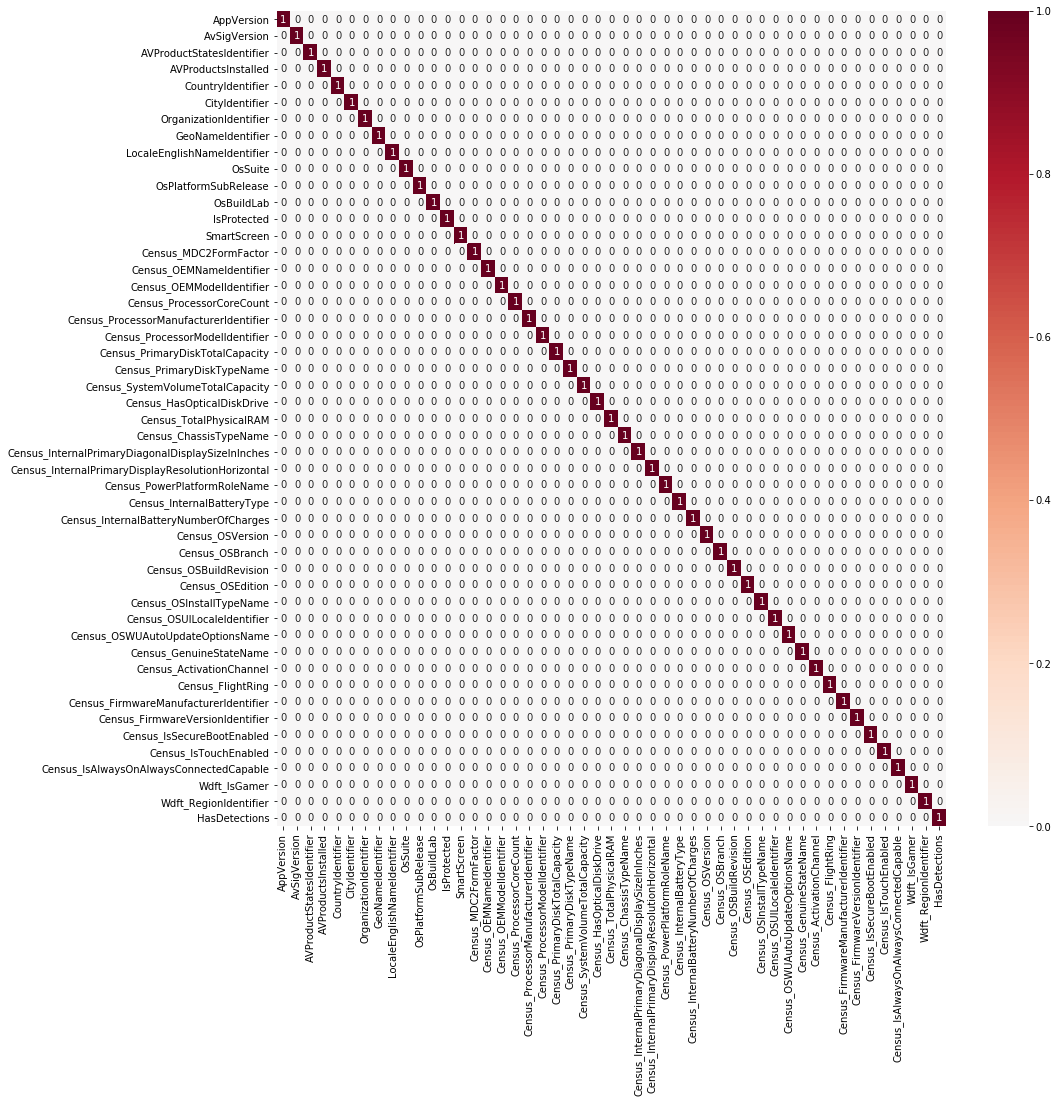

In [104]:
corr = train.corr()
high_corr = (corr >= 0.82).astype('uint8')
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, cmap='RdBu_r', annot=True, center=0.0)
plt.show()

In [110]:
import pickle

In [111]:
with open('train.pkl', 'wb') as f:
    pickle.dump(train, f)

In [112]:
with open('train.pkl', 'rb') as l:
    loaded_train = pickle.load(l)

In [113]:
len(train) == len(loaded_train)

True